In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("C:\\Users\\Krishna\\Desktop\\dataset\\california_housing_train.csv")
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0


In [3]:
x=df.drop(columns="median_house_value")
y=df["median_house_value"]

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=0)
sc=StandardScaler()
sc.fit(xtrain)
sc_xtrain=sc.transform(xtrain)
sc_xtest=sc.transform(xtest)

In [5]:
xtrain.shape

(13600, 8)

In [6]:
from keras.models import Sequential
from keras.layers import Dense
model=Sequential()
# 3 layers
model.add(Dense(15,activation='relu',input_dim=8))
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='linear'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 15)                135       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                160       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 306
Trainable params: 306
Non-trainable params: 0
_________________________________________________________________


In [7]:
from keras.optimizers import SGD

In [8]:
model.compile(loss="mean_squared_error",optimizer=SGD(),metrics=["mse"])

In [9]:
history=model.fit(sc_xtrain,ytrain,epochs=25,batch_size=10)

Epoch 1/25
1360/1360 [==============================] - 3s 1ms/step - loss: 1190739554648482937351176192.0000 - mse: 1190739554648482937351176192.0000
Epoch 2/25
1360/1360 [==============================] - 2s 1ms/step - loss: 14132585646.5540 - mse: 14132585646.5540
Epoch 3/25
1360/1360 [==============================] - 2s 1ms/step - loss: 13631905374.4247 - mse: 13631905701.7134
Epoch 4/25
1360/1360 [==============================] - 2s 2ms/step - loss: 13743717941.7957 - mse: 13743718351.8472
Epoch 5/25
1360/1360 [==============================] - 2s 2ms/step - loss: 13338000619.4974 - mse: 13338000619.4974
Epoch 6/25
1360/1360 [==============================] - 2s 1ms/step - loss: 13350135044.3262 - mse: 13350135044.3262
Epoch 7/25
1360/1360 [==============================] - 2s 2ms/step - loss: 13737684876.8846 - mse: 13737684876.8846
Epoch 8/25
1360/1360 [==============================] - 2s 1ms/step - loss: 13511698325.1609 - mse: 13511698325.1609
Epoch 9/25
1360/1360 [========

In [10]:
history.history.keys()

dict_keys(['loss', 'mse'])

In [11]:
model.evaluate(sc_xtrain,ytrain)

425/425 [==============================] - 1s 1ms/step - loss: 13607823360.0000 - mse: 13607823360.0000


[13607823360.0, 13607823360.0]

In [12]:
model.evaluate(sc_xtest,ytest)

107/107 [==============================] - 0s 2ms/step - loss: 12879281152.0000 - mse: 12879281152.0000


[12879281152.0, 12879281152.0]

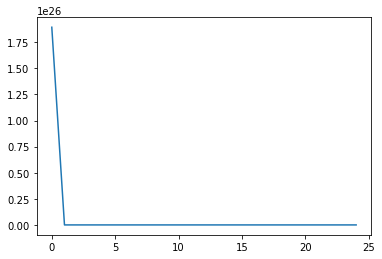

In [18]:
plt.plot(history.history['loss'])

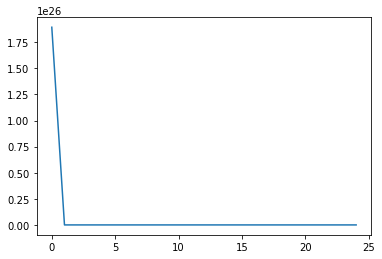

In [19]:
plt.plot(history.history["mse"])

In [20]:
pred=model.predict(sc_xtest)

In [21]:
pred

array([[204034.38],
       [204034.38],
       [204034.38],
       ...,
       [204034.38],
       [204034.38],
       [204034.38]], dtype=float32)

In [22]:
pd.DataFrame({"Actual":np.array(ytest).flatten(),"Predicted":pred.flatten()})

,Actual,Predicted
0,171400.0,204034.375
1,189600.0,204034.375
2,500001.0,204034.375
3,229400.0,204034.375
4,163400.0,204034.375
...,...,...
3395,212500.0,204034.375
3396,210500.0,204034.375
3397,142900.0,204034.375
3398,128300.0,204034.375
